In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


In [409]:
df=pd.read_csv('D:\Downloads\Week\HousingData.csv')
df.head(20)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Dell\AppData\Local\Temp\ipykernel_9820\3386045387.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv('D:\Downloads\Week\HousingData.csv')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [271]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.shape

(506, 14)

In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

<Figure size 2600x1800 with 0 Axes>

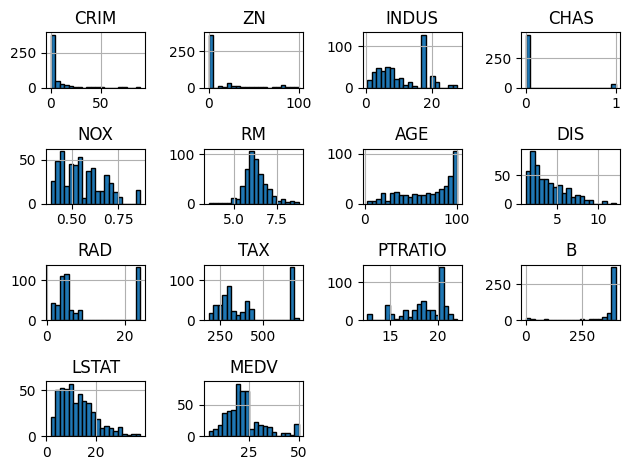

In [410]:
plt.figure(figsize=(26, 18))  
df.hist(bins=20, edgecolor='black')  
plt.tight_layout()
plt.show()

In [238]:
df['INDUS'].unique()
# RAD CHAS are categorical

array([ 2.31      ,  7.07      ,  2.18      ,  7.87      ,  5.96      ,
       11.08399177,  6.91      ,  5.64      ,  5.13      ,  1.38      ,
        6.07      , 10.81      , 12.83      ,  4.86      ,  4.49      ,
        3.41      , 15.04      ,  2.89      ,  8.56      , 10.01      ,
        4.05      ,  2.46      ,  3.44      , 10.59      , 13.89      ,
        6.2       ,  4.93      ,  5.86      ,  6.96      ,  6.41      ,
        3.33      ,  2.25      ,  5.32      , 13.92      ,  6.09      ,
        9.9       ,  7.38      ,  3.24      ,  6.06      ,  5.19      ,
        1.52      ,  1.89      ,  3.78      ,  4.39      ,  1.25      ,
        1.91      ,  9.69      , 11.93      ])

In [9]:
skewness=df['INDUS'].skew()
skewness

np.float64(0.30372218758107833)

In [411]:
lstat_median=df['LSTAT'].median()
df['LSTAT']=df['LSTAT'].fillna(lstat_median)

In [412]:
CRIM_median=df['CRIM'].median()
df['CRIM']=df['CRIM'].fillna(CRIM_median)

In [413]:
ZN_median=df['ZN'].median()
df['ZN']=df['ZN'].fillna(ZN_median)

In [414]:
INDUS_mean=df['INDUS'].mean()
df['INDUS']=df['INDUS'].fillna(INDUS_mean)

In [415]:
CHAS_mode=df['CHAS'].mode()[0]
df['CHAS']=df['CHAS'].fillna(CHAS_mode)

In [416]:
AGE_median=df['AGE'].median()
df['AGE']=df['AGE'].fillna(AGE_median)

In [417]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

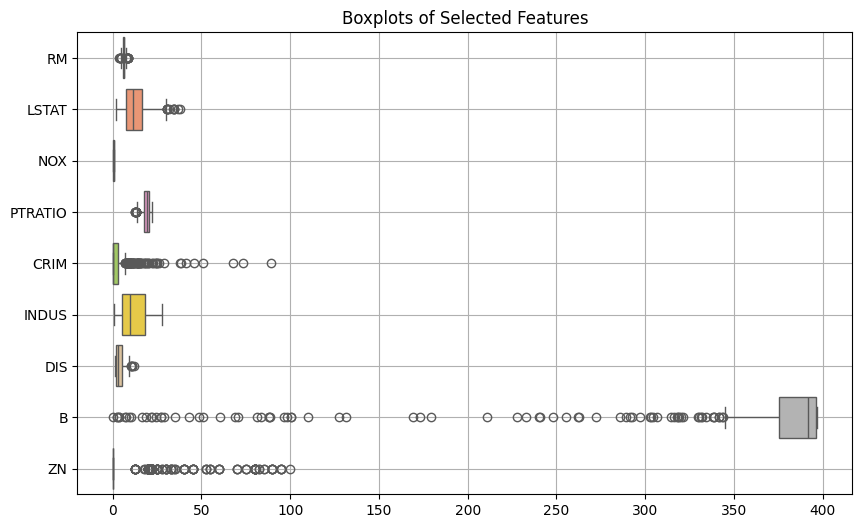

In [359]:
features =['RM','LSTAT','NOX','PTRATIO','CRIM','INDUS','DIS','B','ZN']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[features], orient='h', palette='Set2')
plt.title("Boxplots of Selected Features")
plt.grid(True)
plt.show()

<Axes: >

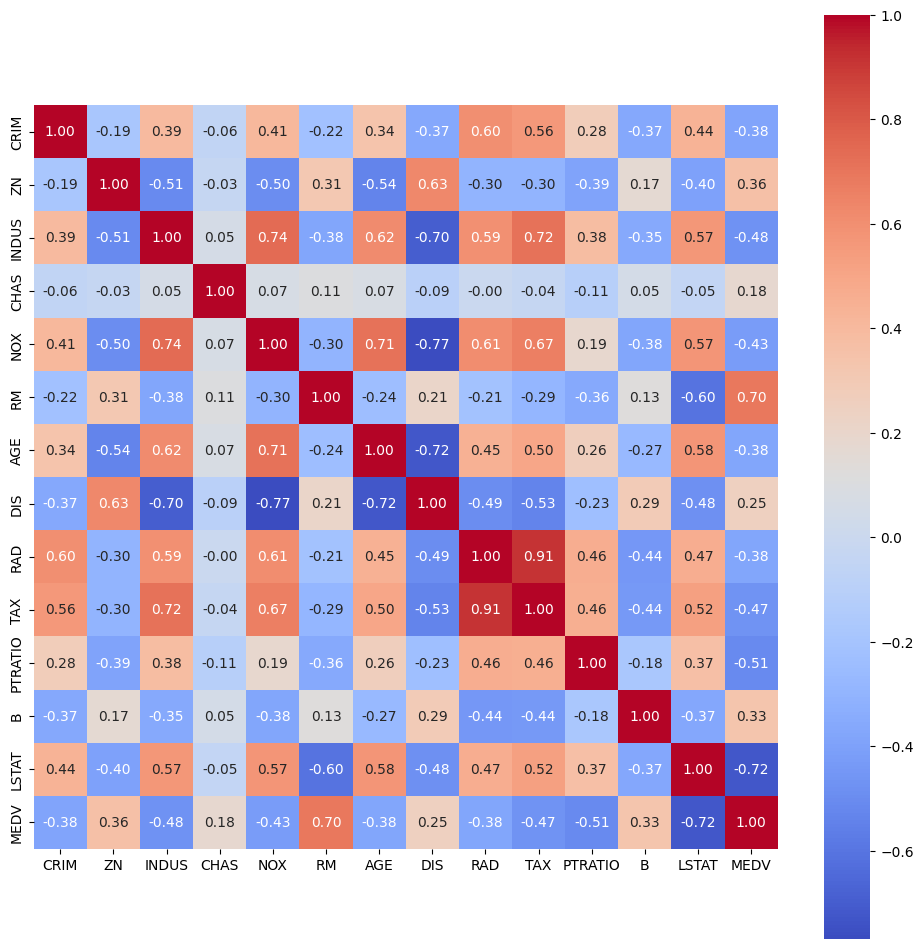

In [280]:
corr_matrix=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', square=True)

In [365]:
'TAX','RM','LSTAT','NOX','PTRATIO'

('TAX', 'RM', 'LSTAT', 'NOX', 'PTRATIO')

INdus,NOX, RM,TAX,PTRATIO,LSTAT have relation with MEDV CRIM CHAS RM               /PTRATIO INdus    /TAX RM NOX LSTAT

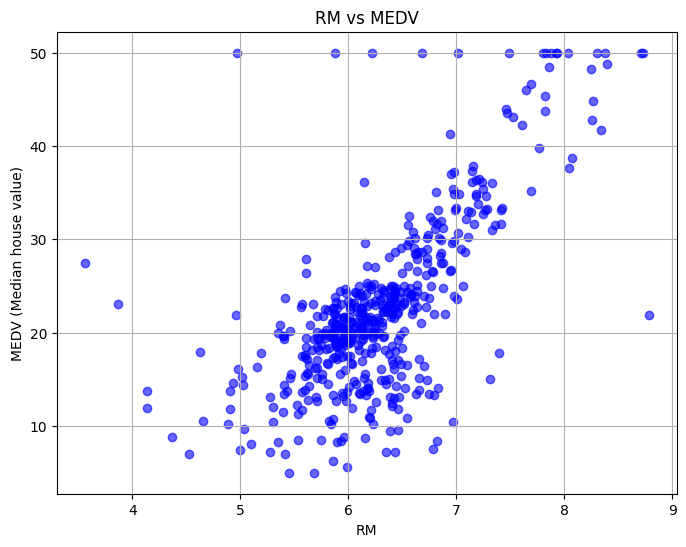

In [360]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['RM'], df['MEDV'], color='blue', alpha=0.6)
plt.title("RM vs MEDV")
plt.xlabel("RM")
plt.ylabel("MEDV (Median house value)")
plt.grid(True)
plt.show()

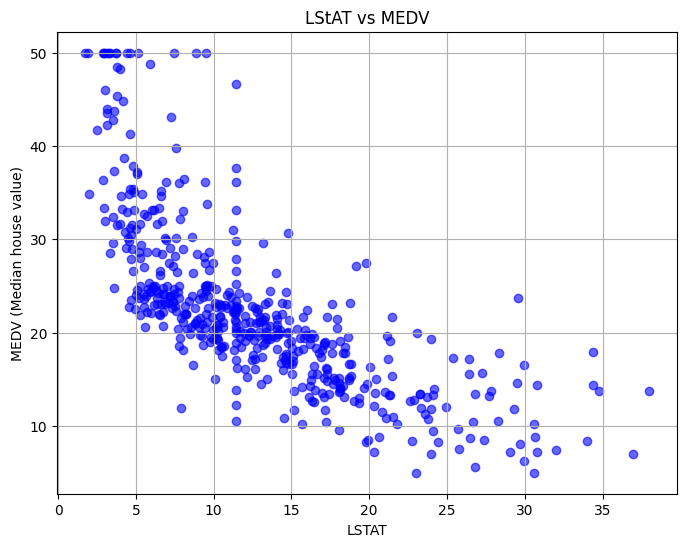

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['LSTAT'], df['MEDV'], color='blue', alpha=0.6)
plt.title("LStAT vs MEDV")
plt.xlabel("LSTAT")
plt.ylabel("MEDV (Median house value)")
plt.grid(True)
plt.show()

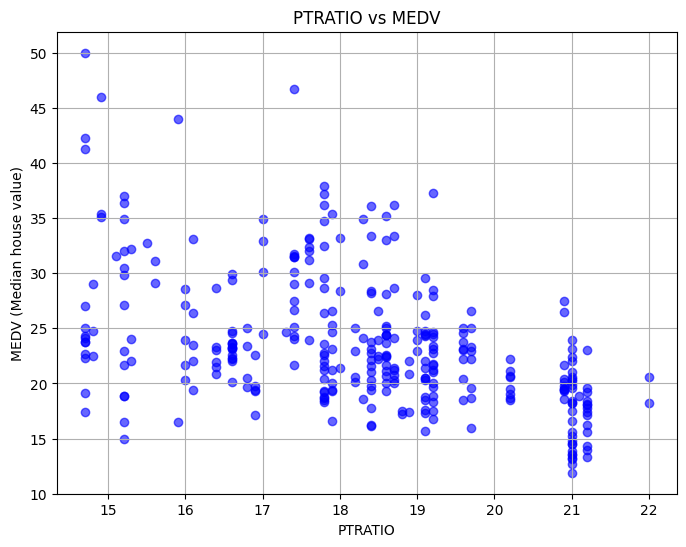

In [454]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['PTRATIO'], df['MEDV'], color='blue', alpha=0.6)
plt.title("PTRATIO vs MEDV")
plt.xlabel("PTRATIO")
plt.ylabel("MEDV (Median house value)")
plt.grid(True)
plt.show()

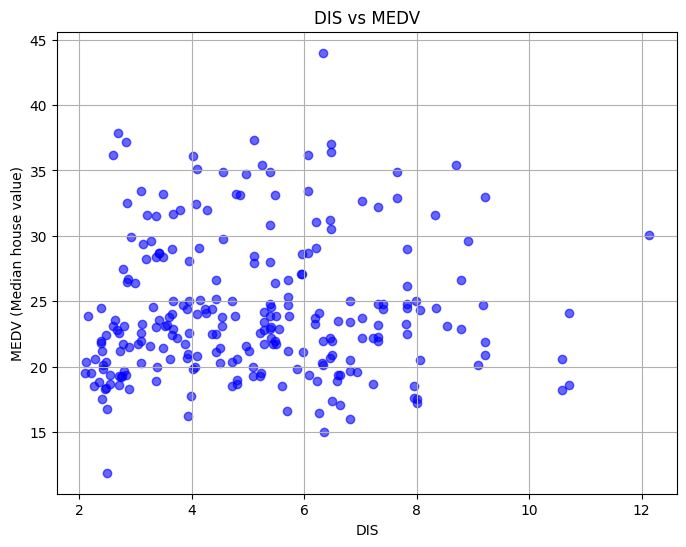

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['B'], df['MEDV'], color='blue', alpha=0.6)
plt.title("DIS vs MEDV")
plt.xlabel("DIS")
plt.ylabel("MEDV (Median house value)")
plt.grid(True)
plt.show()

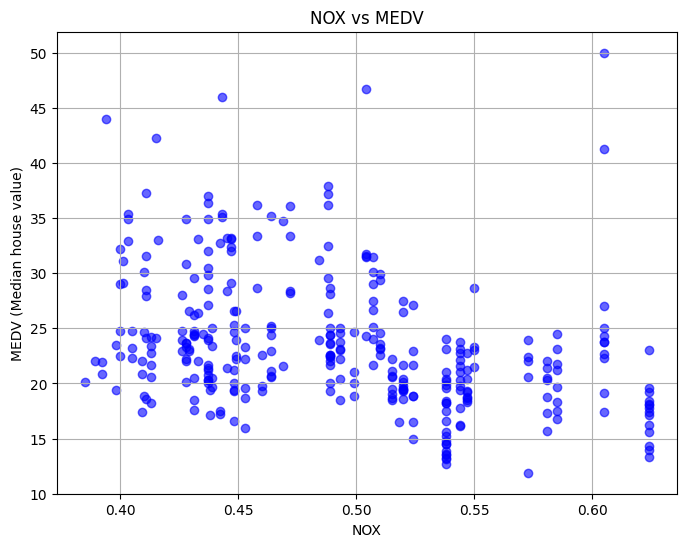

In [424]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['NOX'], df['MEDV'], color='blue', alpha=0.6)
plt.title("NOX vs MEDV")
plt.xlabel("NOX")
plt.ylabel("MEDV (Median house value)")
plt.grid(True)
plt.show()

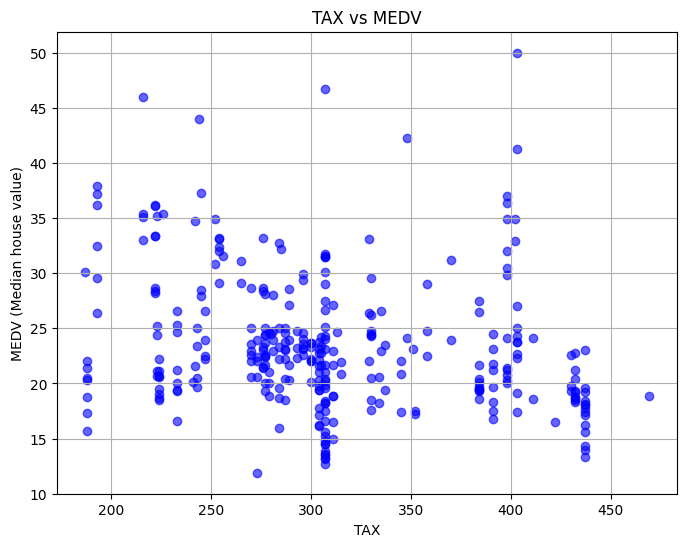

In [425]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['TAX'], df['MEDV'], color='blue', alpha=0.6)
plt.title("TAX vs MEDV")
plt.xlabel("TAX")
plt.ylabel("MEDV (Median house value)")
plt.grid(True)
plt.show()

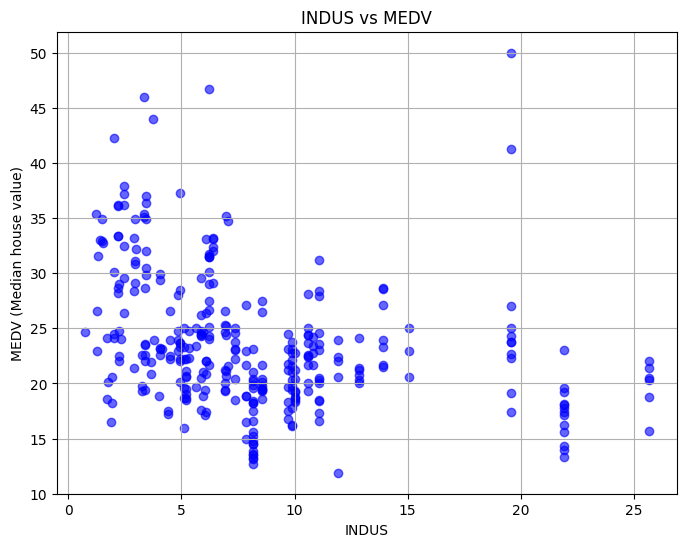

In [426]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['INDUS'], df['MEDV'], color='blue', alpha=0.6)
plt.title("INDUS vs MEDV")
plt.xlabel("INDUS")
plt.ylabel("MEDV (Median house value)")
plt.grid(True)
plt.show()

In [471]:
columns = [ 'LSTAT', 'RM','PTRATIO','CRIM','INDUS','NOX','TAX','AGE']

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

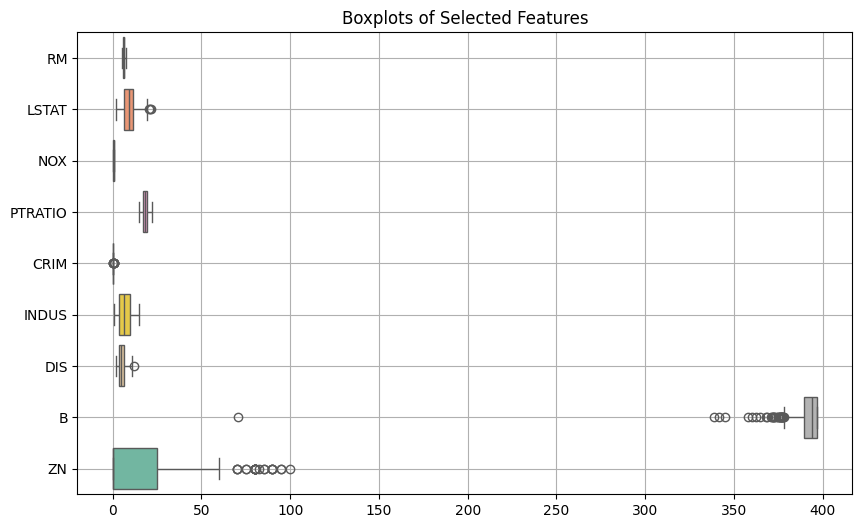

In [472]:
features =['RM','LSTAT','NOX','PTRATIO','CRIM','INDUS','DIS','B','ZN']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[features], orient='h', palette='Set2')
plt.title("Boxplots of Selected Features")
plt.grid(True)
plt.show()

In [466]:
X=df[['RM','LSTAT','PTRATIO','CRIM','AGE','TAX','INDUS']]
y=df['MEDV']

In [467]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [468]:
pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('regressor', LinearRegression())
      ])
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [469]:

y_pred = pipeline.predict(X_test)
print(y_pred)

[21.99787265 20.15311839 15.28421255 28.32761949 21.53504994 18.67219106
 19.3779     27.27264049 30.36247265 17.34338905 31.5997621  21.41860892
 31.93303987 36.92715435 21.98244328 26.91591248 21.80406505 19.15622273
 24.02943423 25.49291135 27.41484952 21.35282591 32.76882608 24.79514562
 25.58034417 21.77271208 19.11414439 15.77020645 19.52816096 25.13645745
 13.9949366  25.56766542 32.66967788 27.2163527  27.0929541  21.53526421
 24.07373099 35.49018717 16.90730373 29.42003585 22.24205799 21.10814694
 24.13401857 22.17790102 20.87549631 30.51994919 25.25154392 24.25880661
 26.38500357 22.77275214 22.75736278 31.85975893 30.66745215 20.59546049
 18.56195563 22.51873184 18.25348327 18.68329336 17.48959974 35.86997344
 16.43586458 17.61968704 23.32144027 14.12128325]


In [470]:
results = pd.DataFrame({
     'Model': ['Linear Regression'],
     'MSE': [mean_squared_error(y_test, y_pred)],
     'R2': [r2_score(y_test, y_pred)],
    
       })
print(results)

               Model       MSE        R2
0  Linear Regression  9.414268  0.827211
